#Performing **Binary Classification** (On Heart Disease Dataset)

In [22]:
#Importig Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [23]:
#Step 2: Load the Kaggle Heart Disease Dataset
df = pd.read_csv("heart.csv")
df.head(3)  # Display the first few rows


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0


#**Perform EDA**



In [24]:
print(df.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [25]:
# Check duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())



Number of duplicate rows: 723


In [26]:
print(df.describe())


               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [27]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [28]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [29]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


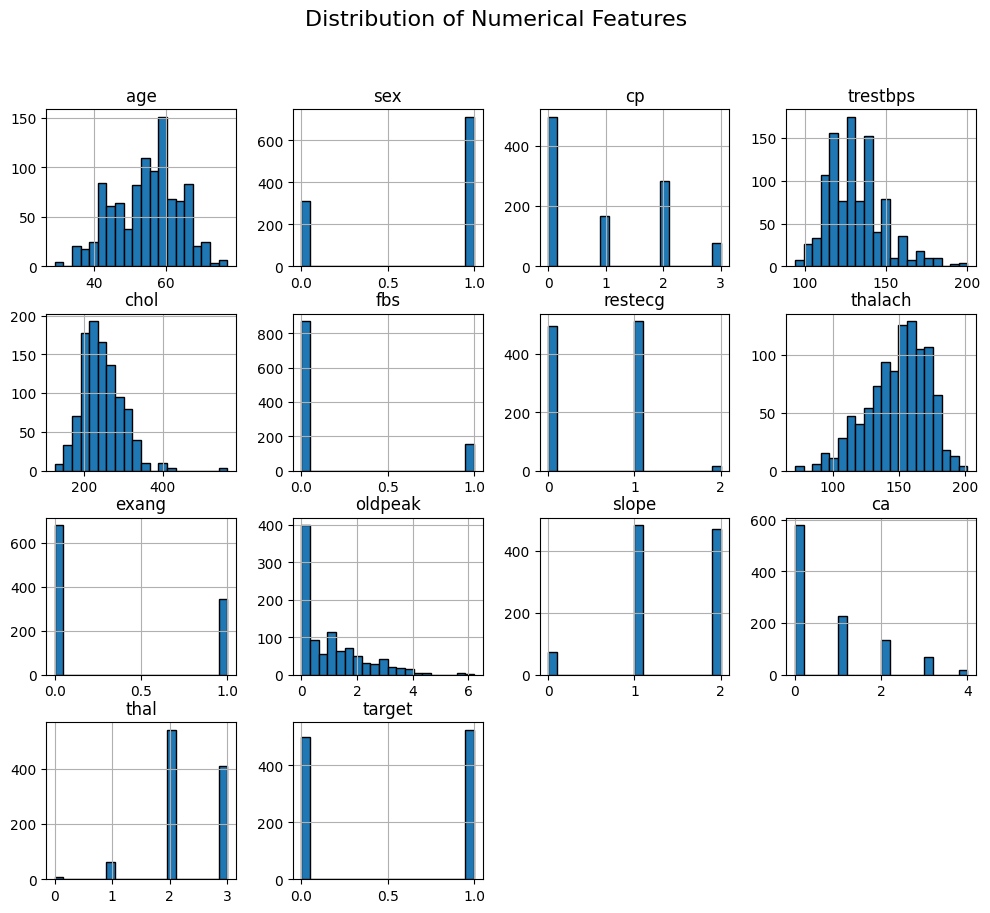

In [30]:
# Plot distribution of all numerical features
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.show()


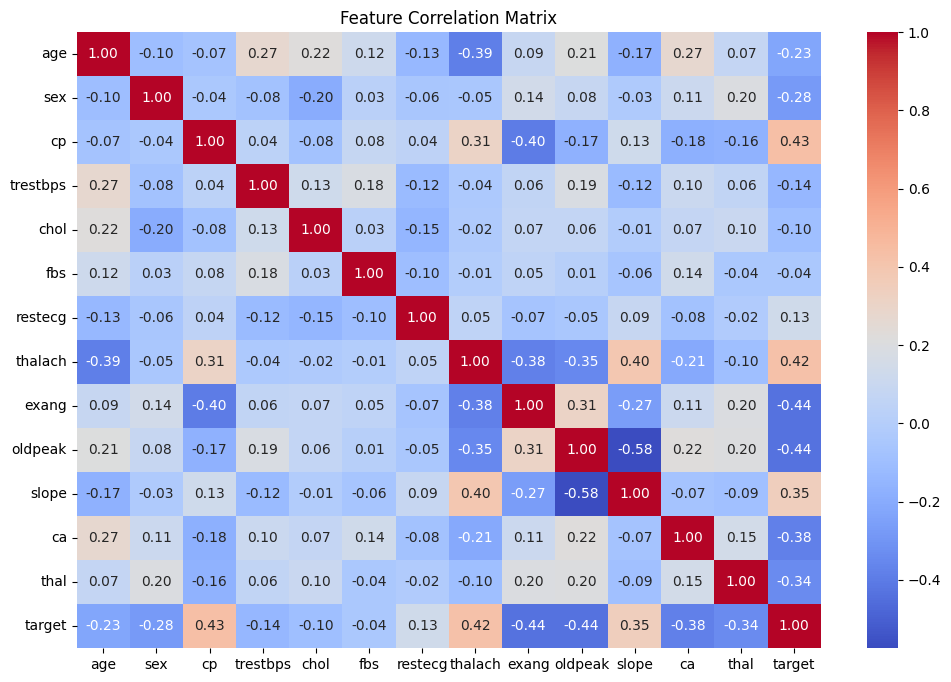

In [31]:
# Compute correlation matrix
corr_matrix = df.corr()

# Visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


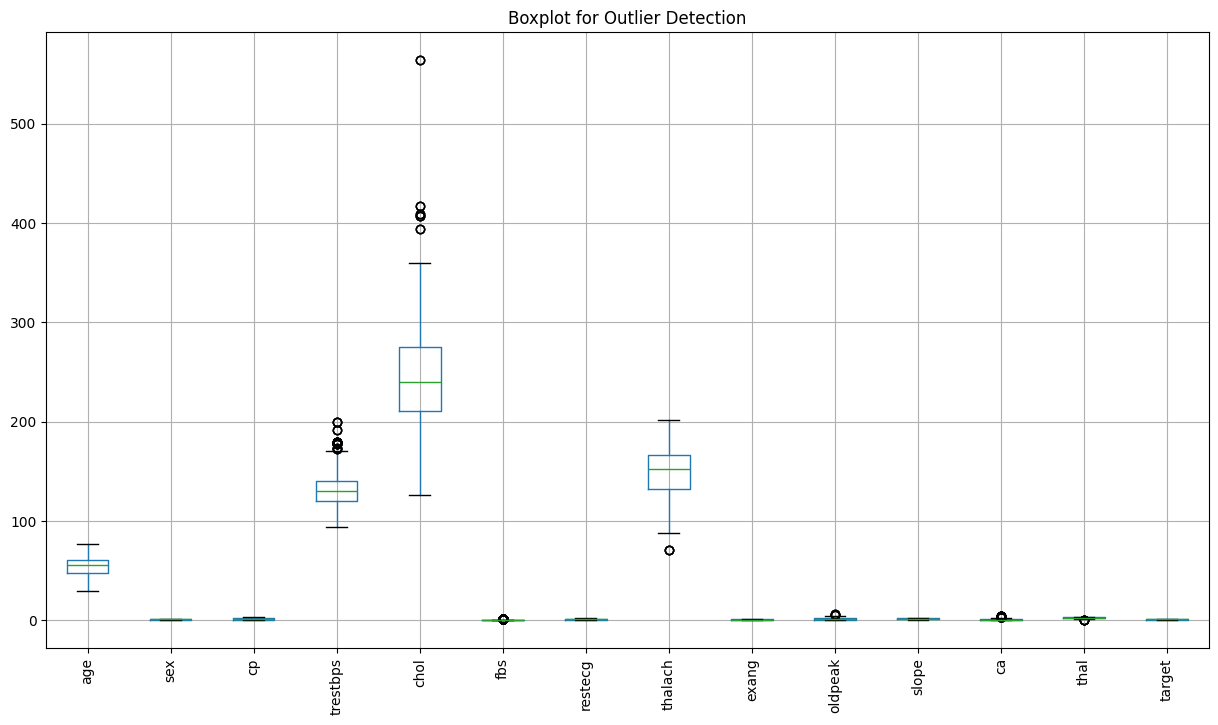

In [32]:
plt.figure(figsize=(15, 8))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


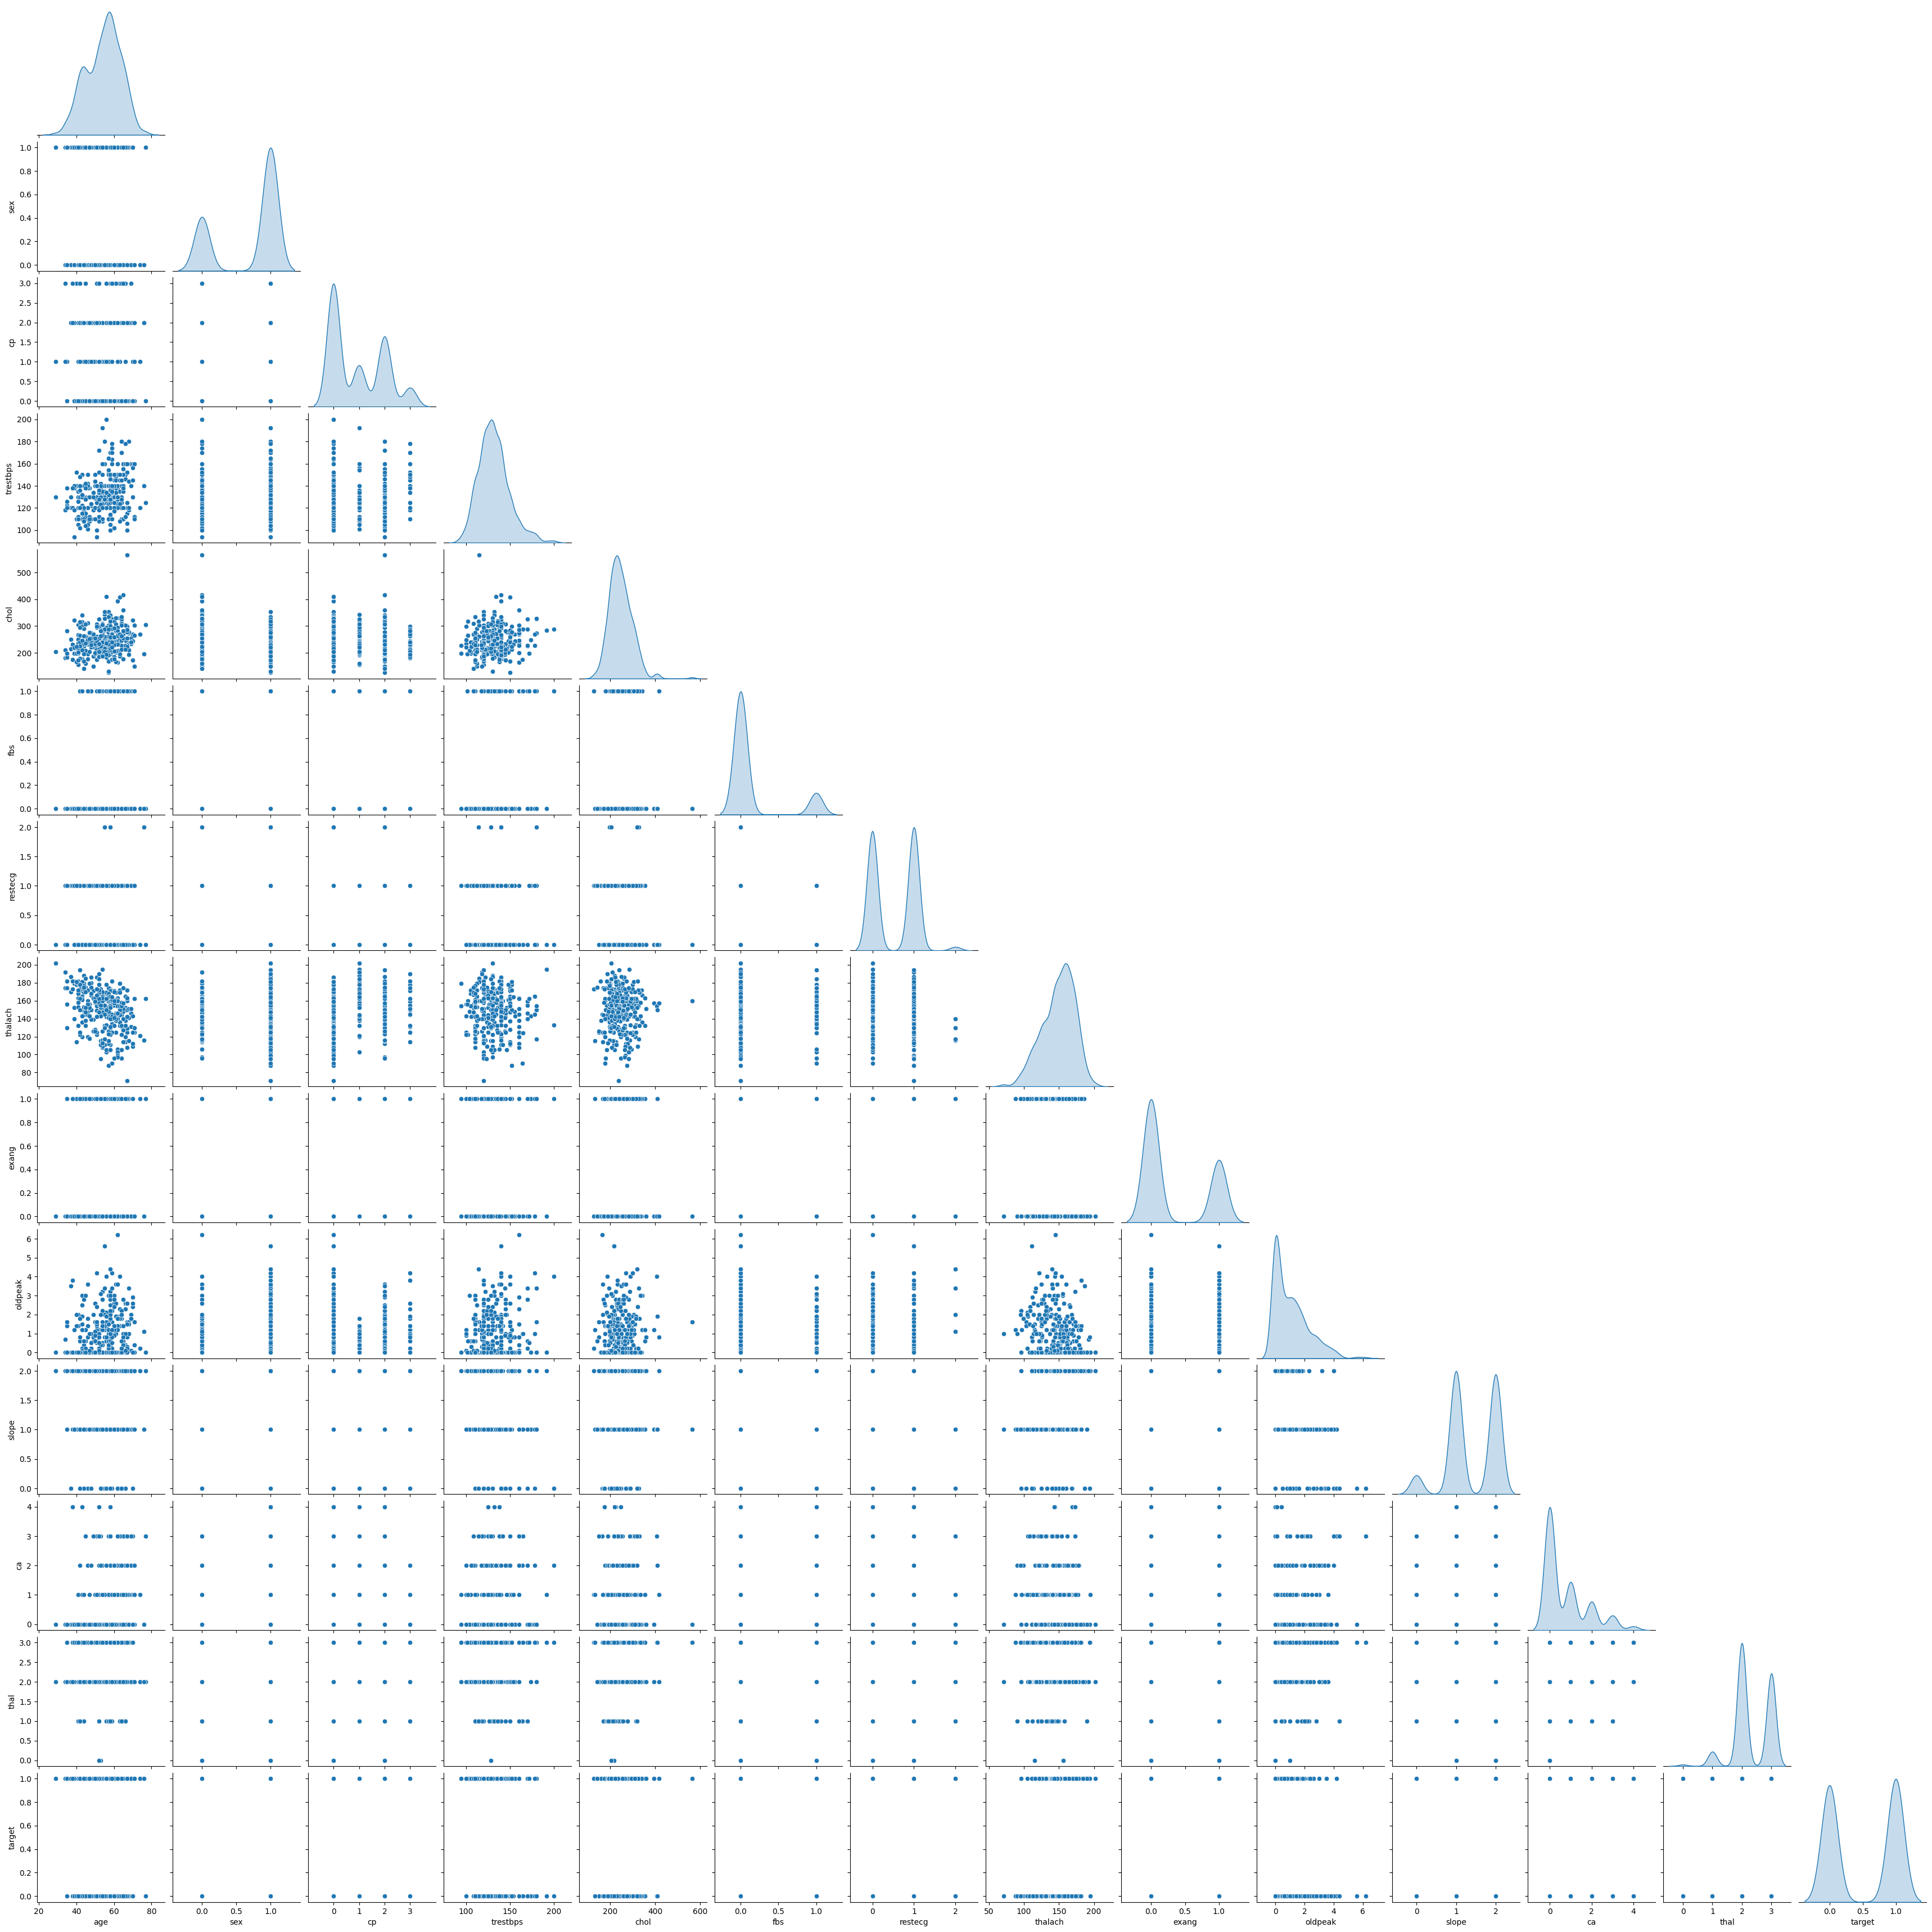

In [33]:
# Pairplot for numerical features
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()


In [34]:
# Check value counts of target variable
print("\nClass Distribution:")
print(df['target'].value_counts())


Class Distribution:
target
1    526
0    499
Name: count, dtype: int64


<ipython-input-35-7a3c1992fb2a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['target'], palette=['blue', 'orange'])


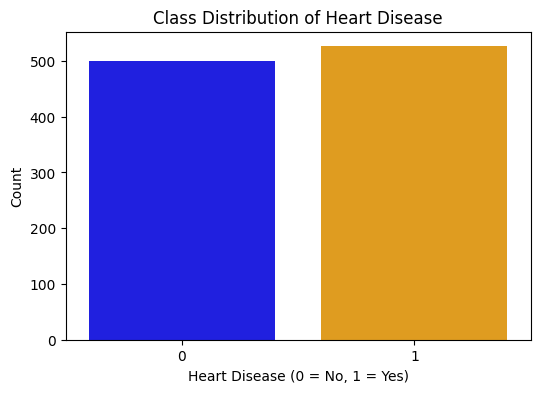

In [35]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'], palette=['blue', 'orange'])
plt.title("Class Distribution of Heart Disease")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


**Perform all necessary Pre_processing**


In [36]:
#we can apply balancing technique but data is not highly imbalanced
#this code file is proper for different types of binary classifier , so learn its implementation

**Split Data into X and Y**

In [37]:
#Split Data into X and Y
y=df.pop('target')
x=df

In [38]:
#Split Data into Train Test Dataser
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)


#**Applying ML Binary Classifier algorithm**

#Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
# ============== Logistic Regression ============== #
LR = LogisticRegression()
ModelLR = LR.fit(xtrain, ytrain)
PredictionLR = LR.predict(xtest)

print("=====================Logistic Regression Training Accuracy=============")
print(LR.score(xtrain, ytrain) * 100)

print("=====================Logistic Regression Testing Accuracy=============")
print(accuracy_score(ytest, PredictionLR) * 100)

print(classification_report(ytest, PredictionLR))
print(confusion_matrix(ytest, PredictionLR))


=====================Logistic Regression Training Accuracy=============
85.36585365853658
=====================Logistic Regression Testing Accuracy=============
83.41463414634146
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.81      0.90      0.85       106

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.84      0.83      0.83       205

[[76 23]
 [11 95]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#KNN

In [40]:
#Step 5: Train a Machine Learning Model using any Binary Classifier (Logistic Regression , SVM, KNN, etc)

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier()
ModelKNN = KNN.fit(xtrain,ytrain)
PredictionKNN = KNN.predict(xtest)

# =====================ACCUARACY===========================
print("=====================KNN Training Accuarcy=============")
tracKNN=KNN.score(xtrain,ytrain)
trainingAccKNN=tracKNN*100
print(trainingAccKNN)
print("====================KNN Testing Accuracy============")
teacKNN=accuracy_score(ytest,PredictionKNN)
testingAccKNN=teacKNN*100
print(testingAccKNN)

print(classification_report(ytest, PredictionKNN))
confusion_matrix(ytest, PredictionKNN)


=====================KNN Training Accuarcy=============
91.58536585365854
====================KNN Testing Accuracy============
71.21951219512195
              precision    recall  f1-score   support

           0       0.70      0.71      0.70        99
           1       0.72      0.72      0.72       106

    accuracy                           0.71       205
   macro avg       0.71      0.71      0.71       205
weighted avg       0.71      0.71      0.71       205



array([[70, 29],
       [30, 76]])

#Decision Tree

In [41]:

from sklearn.tree import DecisionTreeClassifier
# ============== Decision Tree Classifier ============== #
DT = DecisionTreeClassifier()
ModelDT = DT.fit(xtrain, ytrain)
PredictionDT = DT.predict(xtest)

print("=====================Decision Tree Training Accuracy=============")
print(DT.score(xtrain, ytrain) * 100)

print("=====================Decision Tree Testing Accuracy=============")
print(accuracy_score(ytest, PredictionDT) * 100)

print(classification_report(ytest, PredictionDT))
print(confusion_matrix(ytest, PredictionDT))



=====================Decision Tree Training Accuracy=============
100.0
=====================Decision Tree Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[ 99   0]
 [  0 106]]


#SVM

In [42]:
from sklearn.svm import SVC
# ============== Support Vector Machine (SVM) ============== #
SVM = SVC()
ModelSVM = SVM.fit(xtrain, ytrain)
PredictionSVM = SVM.predict(xtest)

print("=====================SVM Training Accuracy=============")
print(SVM.score(xtrain, ytrain) * 100)

print("=====================SVM Testing Accuracy=============")
print(accuracy_score(ytest, PredictionSVM) * 100)

print(classification_report(ytest, PredictionSVM))
print(confusion_matrix(ytest, PredictionSVM))



=====================SVM Training Accuracy=============
70.0
=====================SVM Testing Accuracy=============
69.7560975609756
              precision    recall  f1-score   support

           0       0.71      0.64      0.67        99
           1       0.69      0.75      0.72       106

    accuracy                           0.70       205
   macro avg       0.70      0.70      0.70       205
weighted avg       0.70      0.70      0.70       205

[[63 36]
 [26 80]]


#Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
# ============== Random Forest Classifier ============== #
RF = RandomForestClassifier()
ModelRF = RF.fit(xtrain, ytrain)
PredictionRF = RF.predict(xtest)

print("=====================Random Forest Training Accuracy=============")
print(RF.score(xtrain, ytrain) * 100)

print("=====================Random Forest Testing Accuracy=============")
print(accuracy_score(ytest, PredictionRF) * 100)

print(classification_report(ytest, PredictionRF))
print(confusion_matrix(ytest, PredictionRF))


=====================Random Forest Training Accuracy=============
100.0
=====================Random Forest Testing Accuracy=============
100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        99
           1       1.00      1.00      1.00       106

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

[[ 99   0]
 [  0 106]]


#Gaussian Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB
# ============== Naïve Bayes (GaussianNB) ============== #
NB = GaussianNB()
ModelNB = NB.fit(xtrain, ytrain)
PredictionNB = NB.predict(xtest)

print("=====================Naïve Bayes Training Accuracy=============")
print(NB.score(xtrain, ytrain) * 100)

print("=====================Naïve Bayes Testing Accuracy=============")
print(accuracy_score(ytest, PredictionNB) * 100)

print(classification_report(ytest, PredictionNB))
print(confusion_matrix(ytest, PredictionNB))

=====================Naïve Bayes Training Accuracy=============
82.80487804878048
=====================Naïve Bayes Testing Accuracy=============
81.95121951219512
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.80      0.87      0.83       106

    accuracy                           0.82       205
   macro avg       0.82      0.82      0.82       205
weighted avg       0.82      0.82      0.82       205

[[76 23]
 [14 92]]


#GradientBoostingClassifier

In [45]:
from sklearn.ensemble import GradientBoostingClassifier

# ============== Gradient Boosting Classifier ============== #
GB = GradientBoostingClassifier()
ModelGB = GB.fit(xtrain, ytrain)
PredictionGB = GB.predict(xtest)

print("=====================Gradient Boosting Training Accuracy=============")
print(GB.score(xtrain, ytrain) * 100)

print("=====================Gradient Boosting Testing Accuracy=============")
print(accuracy_score(ytest, PredictionGB) * 100)

print(classification_report(ytest, PredictionGB))
print(confusion_matrix(ytest, PredictionGB))


=====================Gradient Boosting Training Accuracy=============
98.53658536585365
=====================Gradient Boosting Testing Accuracy=============
94.14634146341463
              precision    recall  f1-score   support

           0       0.97      0.91      0.94        99
           1       0.92      0.97      0.94       106

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

[[ 90   9]
 [  3 103]]
